In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mpl.rc('font', family="")
mpl.rc('axes', unicode_minus=False)

In [3]:
# Add every font at the specified location
font_dir = ['./datas/Noto_Sans_KR']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
['Noto Sans KR']


stack overflow annual dev survey를 분석해 보자.

In [4]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv', index_col='ResponseId')

In [5]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

schema 파일을 통해 질문에 접근해 보자.

In [6]:
schema_raw = pd.read_csv('datas/survey_results_schema.csv', index_col='qname').question

In [7]:
schema_raw.CompTotal

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [8]:
schema_raw.CompFreq

'Is that compensation weekly, monthly, or yearly?'

In [9]:
pd.set_option('display.max_columns', 78)

In [10]:
pd.set_option('display.max_rows', 78)

In [11]:
selected_columns=[
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    'Employment',
    'DevType',
    'WorkExp'
]

In [12]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


우선 얼마나 코딩을 공부했는지 보자.

In [13]:
schema_raw.YearsCode

'Including any education, how many years have you been coding in total?'

In [14]:
survey_df.YearsCode.value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

연습문제 - 해당 시리즈의 nan값을 확인하는 함수를 만들어 보시오.

In [15]:
def count_nan(s):
    return sum(s.isnull())

In [16]:
count_nan(survey_df.YearsCode)

1937

연습문제 - YearsCode의 less than 1 year의 값은 0으로, More than 50 years의 값은 51로 일괄적으로 변경하려고 한다. dtype을 float으로 바꾸고 이를 YearsCode에 적용하시오.

In [17]:
survey_df.YearsCode.replace(to_replace='Less than 1 year', value=0, inplace=True)

In [18]:
survey_df.YearsCode.replace(to_replace='More than 50 years', value=51, inplace=True)

In [19]:
survey_df.YearsCode = survey_df.YearsCode.astype(float)

In [20]:
survey_df.YearsCodePro.replace(to_replace='Less than 1 year', value=0, inplace=True)
survey_df.YearsCodePro.replace(to_replace='More than 50 years', value=51, inplace=True)
survey_df.YearsCodePro = survey_df.YearsCodePro.astype(float)

In [21]:
survey_df.YearsCodePro.value_counts()

3.0     4261
5.0     4057
2.0     3945
4.0     3884
10.0    3333
6.0     3184
7.0     2760
8.0     2646
1.0     2644
0.0     1972
15.0    1822
12.0    1711
9.0     1583
20.0    1472
11.0    1369
14.0    1048
22.0     933
16.0     921
13.0     914
25.0     877
18.0     787
17.0     723
30.0     568
23.0     463
24.0     454
21.0     429
19.0     380
26.0     320
27.0     286
35.0     266
28.0     254
32.0     223
40.0     175
29.0     126
33.0     122
31.0     121
34.0     113
36.0     111
37.0     100
38.0      96
42.0      67
45.0      52
39.0      51
41.0      42
51.0      41
43.0      31
44.0      26
46.0      19
48.0      18
50.0      14
47.0      10
49.0       9
Name: YearsCodePro, dtype: int64

In [22]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [23]:
survey_df2 = survey_raw_df[selected_columns].copy()

In [24]:
survey_df2.YearsCode = pd.to_numeric(survey_df2.YearsCode, errors='coerce')
survey_df2.YearsCodePro = pd.to_numeric(survey_df2.YearsCodePro, errors='coerce')

In [25]:
survey_df2.YearsCode.dropna()

ResponseId
3        14.0
4        20.0
5         8.0
6        15.0
7         3.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 69746, dtype: float64

젠더와 성별에 대한 칼럼을 뽑아 보면 예상 외로 값이 다양한 것을 볼 수 있다.

In [26]:
survey_df.Gender.value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

contains()메서드로 값을 찾을 수 있다. na 키워드 인수를 활용해서 nan 값을 대신할 값을 넣을 수 있다.

In [27]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [28]:
survey_df.Gender.value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [29]:
sns.set_style('darkgrid')

In [30]:
mpl.rcParams['font.size']=14

In [31]:
mpl.rcParams['figure.figsize']=(9, 5)

In [32]:
mpl.rcParams['figure.facecolor']='#ffffff'

In [33]:
mpl.rcParams['axes.facecolor']='white'

In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [35]:
plt.style.use('classic')

In [36]:
plt.style.use('default')

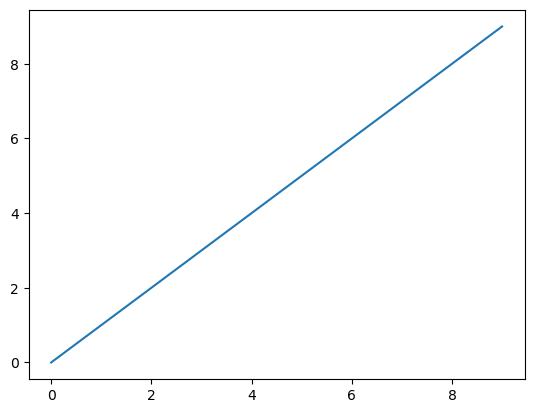

In [37]:
plt.plot(range(10))
plt.show()

스택오버플로우의 커뮤니티 특성상 갖게 되는 데이터의 편향적 특징에 대해 살펴보자. 거주 국가를 먼저 볼 수 있겠다.

In [38]:
survey_df.Country.nunique()

180

연습문제 - 응답자 상위 15개 국가를 구해 보시오.

In [39]:
survey_df.Country.value_counts().head(15)

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

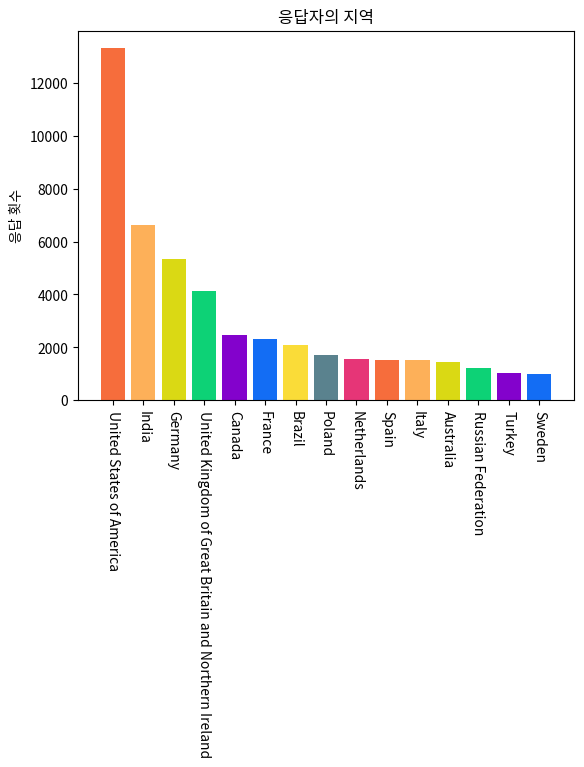

In [40]:
mpl.rcParams['font.family'] = 'Noto Sans KR'
plt.bar(list(survey_df.Country.value_counts().head(15).index), list(survey_df.Country.value_counts().head(15)), color = np.random.rand(9, 3))
plt.xticks(rotation=270)
plt.title('응답자의 지역')
plt.ylabel('응답 횟수')
plt.show()

응답자의 대부분이 영어권 국가임을 볼 수 있다. 이번엔 연령 분포를 살펴보자.

In [44]:
l = list(survey_df.Age.value_counts().index.sort_values())

In [45]:
count_nan(survey_df.Age)

3011

Text(0, 0.5, '응답 횟수')

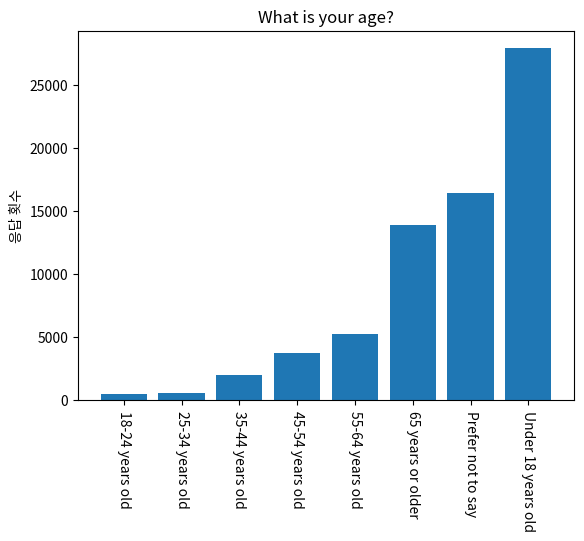

In [46]:
plt.bar(l, list(survey_df.Age.value_counts().sort_values()))
plt.xticks(rotation=270)
plt.title('What is your age?')
plt.ylabel('응답 횟수')

성별에 대한 응답 분포를 보면 남성이 압도적으로 많음을 알 수 있다.

In [47]:
gender_counts=survey_df.Gender.value_counts(True)

In [48]:
gender_counts

Man                                                  0.920839
Woman                                                0.048446
Prefer not to say                                    0.016704
Non-binary, genderqueer, or gender non-conforming    0.010034
Or, in your own words:                               0.003977
Name: Gender, dtype: float64

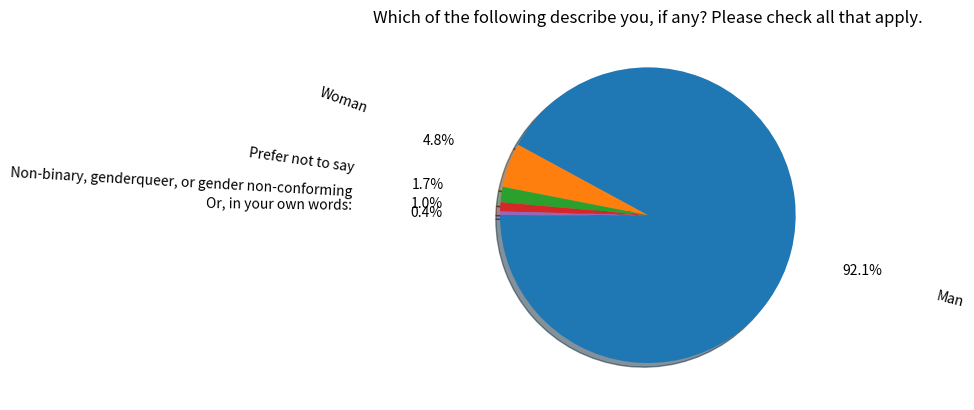

In [49]:
plt.pie(gender_counts,labels=gender_counts.index, startangle=180, autopct='%1.1f%%', shadow=True, rotatelabels=True,
       labeldistance=2, pctdistance=1.5)
plt.title(f'{schema_raw.Gender}')
plt.show()

이번엔 교육 수준을 살펴보자.

In [50]:
schema_raw.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [51]:
survey_df.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

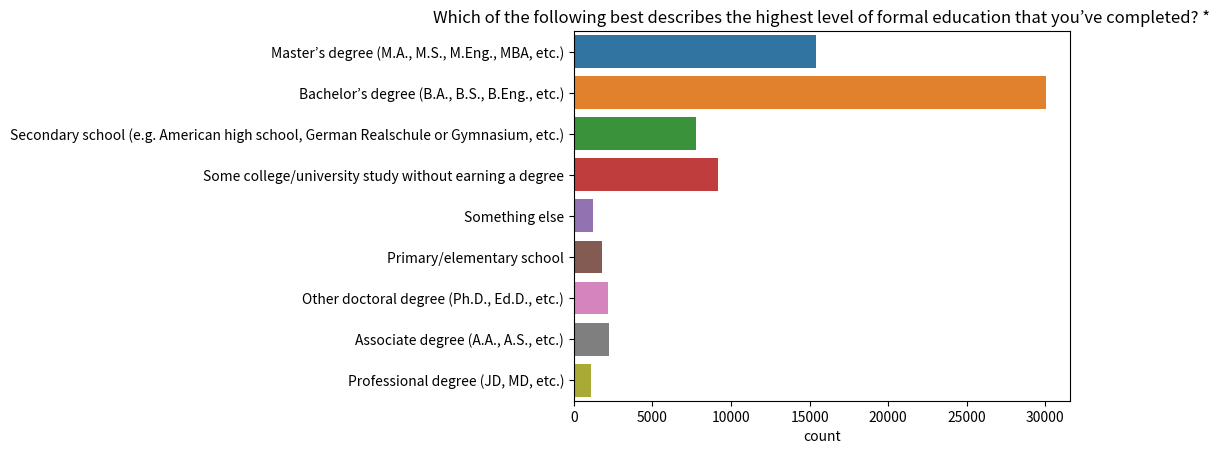

In [52]:
sns.countplot(survey_df, y='EdLevel')
plt.title(schema_raw.EdLevel)
plt.ylabel(None)
plt.show()

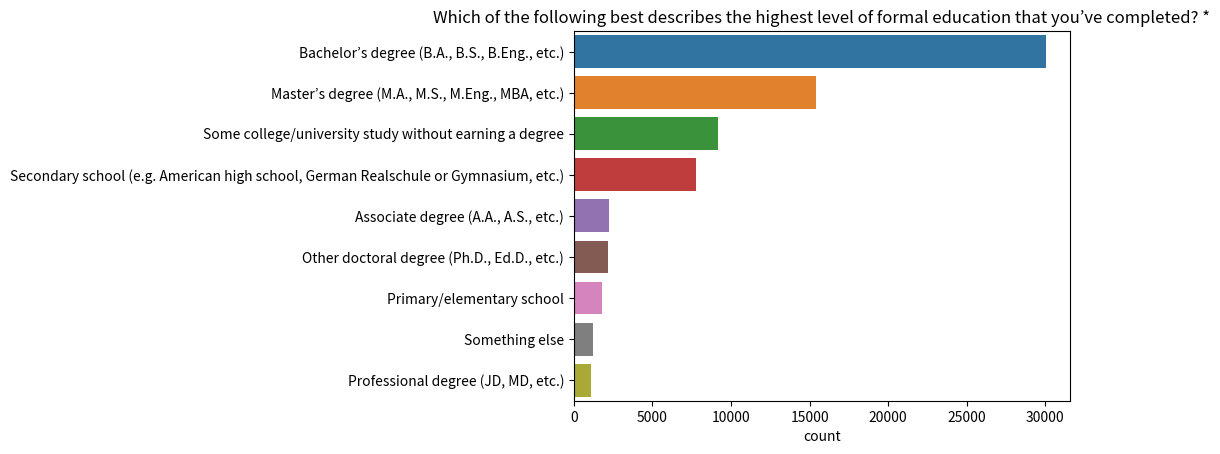

In [53]:
sns.countplot(survey_df, y='EdLevel', order=list(survey_df.EdLevel.value_counts().index))
plt.title(schema_raw.EdLevel)
plt.ylabel(None)
plt.show()

응답자의 40파센트가 학사학위 소지자임을 알 수 있다. 또 22퍼센트가 석사 학위 소지자이며, 총 66퍼센트가 학사 이상 학력이다.
이번엔 고용 형태를 보자.

In [54]:
schema_raw.Employment

'Which of the following best describes your current employment status?'

In [55]:
plt.bar((survey_df.Employment.value_counts(True, ascending=False)*100).head(15))

TypeError: bar() missing 1 required positional argument: 'height'

응답자가 맡은 역할인 DevType도 살펴보자. 종류가 매우 다양해서 처리하기가 까다롭다.

In [56]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7091
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5274
Developer, front-end                                                                                                                            

연습문제

In [57]:
df = pd.DataFrame(survey_df.DevType)

In [113]:
def split_multicolumn(s):
    s.dropna(inplace=True)
    df = pd.DataFrame({})
    for x in s.str.split(';').items():
        df.loc[x[0],x[1]]=True
    df.fillna(False,inplace=True)
    return df
    
DevType = split_multicolumn(survey_df.DevType)

연습문제 - 앞서 구한 데이터프레임을 활용하여 column 별 집계를 만들어 보시오.

In [71]:
DevType

In [83]:
DevType.sum().sort_values(ascending=False)

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

In [86]:
devtype_percentage=DevType.sum().sort_values(ascending=False)/(DevType.sum().sort_values(ascending=False).sum())*100

In [87]:
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

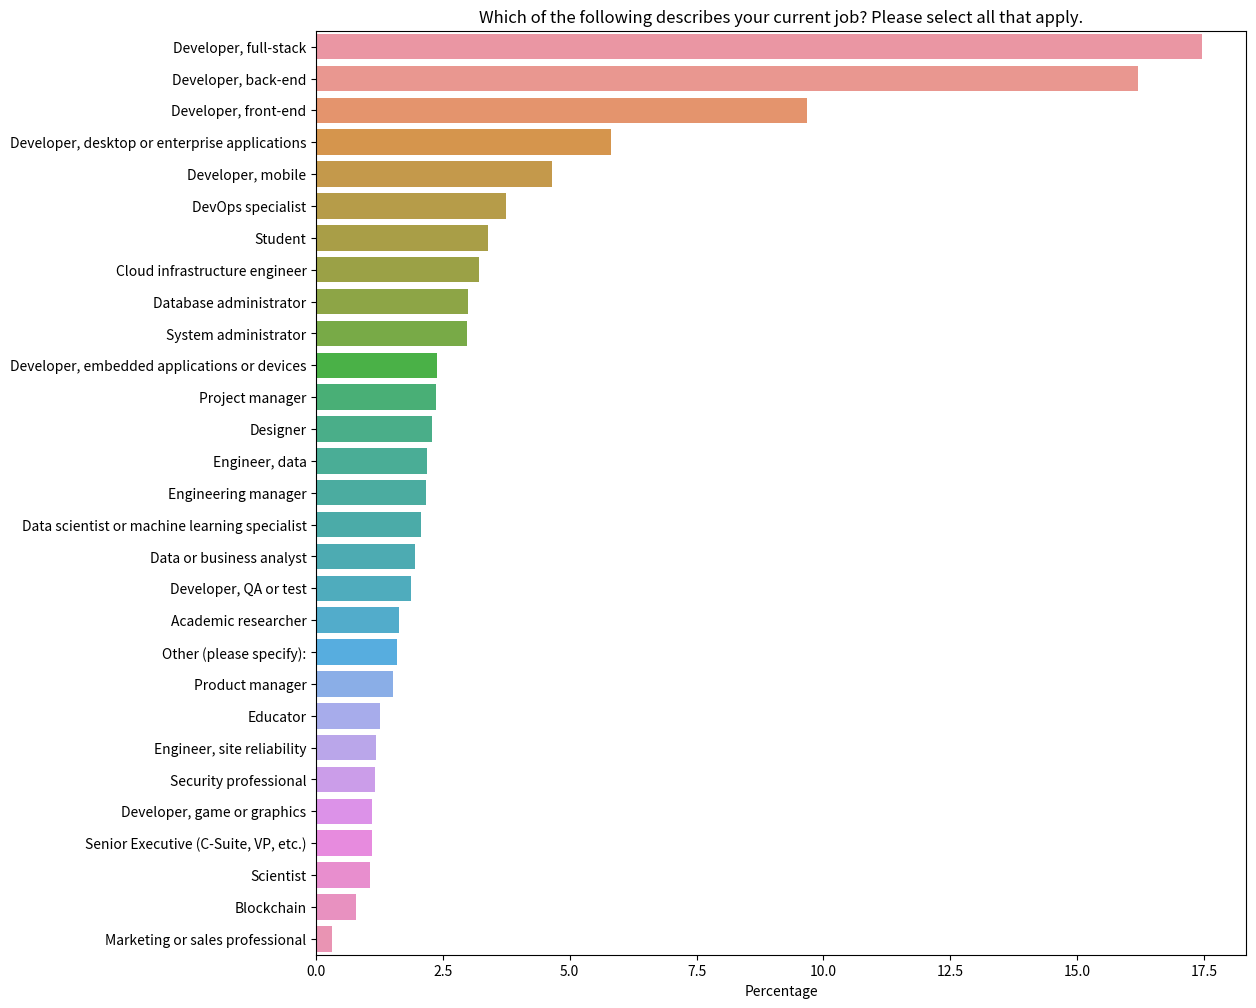

In [102]:
plt.figure(figsize=(12, 12))
sns.barplot(x=devtype_percentage.values, y=devtype_percentage.index)
plt.title(schema_raw.DevType)
plt.xlabel('Percentage')
plt.show()

연습문제 - LanguageHaveWorkedWith 컬럼을 이용해서 똑같은 그래프를 그려보시오.

In [103]:
survey_df.LanguageHaveWorkedWith

ResponseId
1                                                      NaN
2                                    JavaScript;TypeScript
3                        C#;C++;HTML/CSS;JavaScript;Python
4                             C#;JavaScript;SQL;TypeScript
5              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73264    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266                   HTML/CSS;JavaScript;PHP;Python;SQL
73267                                        C#;Delphi;VBA
73268          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object

In [104]:
language = split_multicolumn(survey_df.LanguageHaveWorkedWith)

In [106]:
del language['LanguageHaveWorkedWith']

In [110]:
language_percentage = language.sum().sort_values(ascending=False)/(language.sum().sort_values(ascending=False).sum())*100

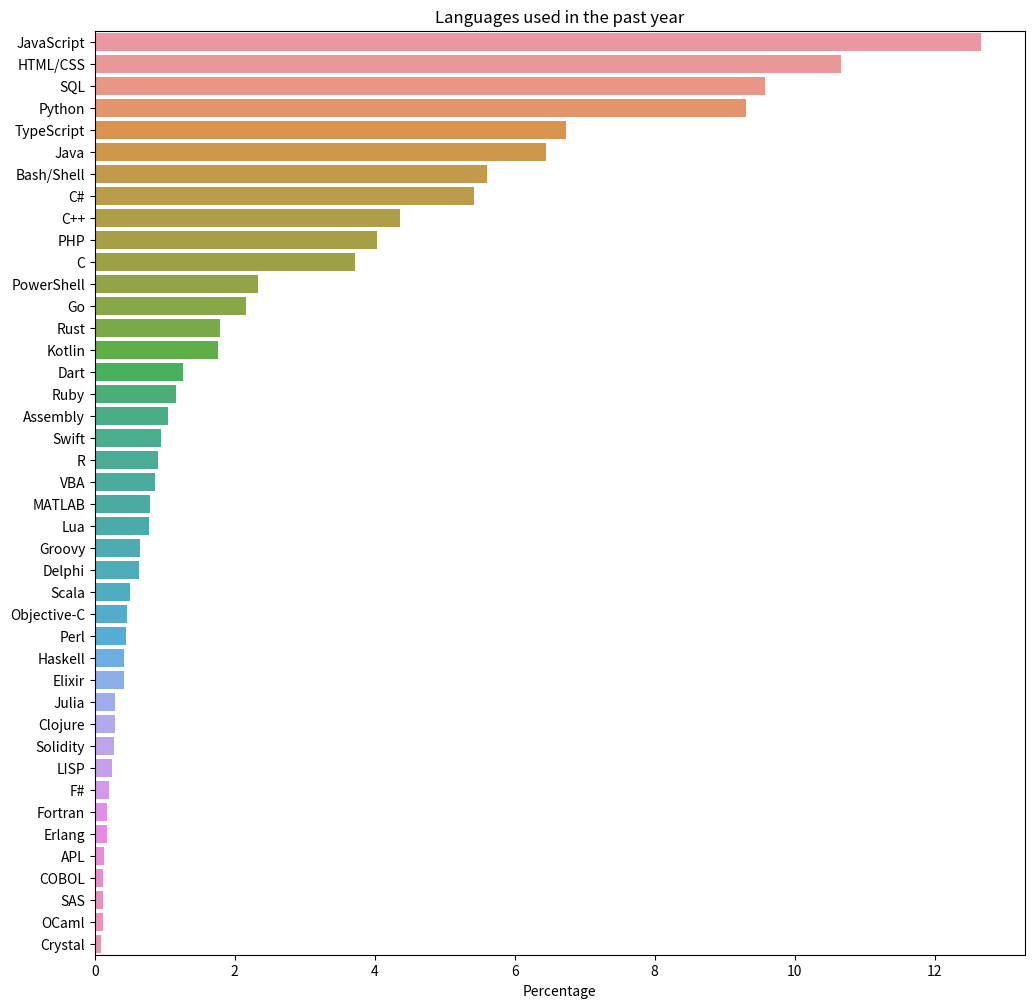

In [112]:
plt.figure(figsize=(12, 12))
sns.barplot(x=language_percentage.values, y=language_percentage.index)
plt.title('Languages used in the past year')
plt.xlabel('Percentage')
plt.show()

연습문제 - 사는 곳이 한국인 응답자의 기술 스택의 분포를 구해보시오.